# Sentimental Analysis for Student Reviews on Coursera

   3 pretrained NLTK(natural language toolkit) models were used to perform this analysis :-
* VADER
* ROBERTA
* PIPELINE


# IMPORTING LIBRARIES AND DATASET

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

imported dataset to variable df with 1.4 million rows and 5 coloumns

In [90]:
df = pd.read_csv('Coursera_reviews.csv')
print(df.shape)
df.head()

(1454711, 5)


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


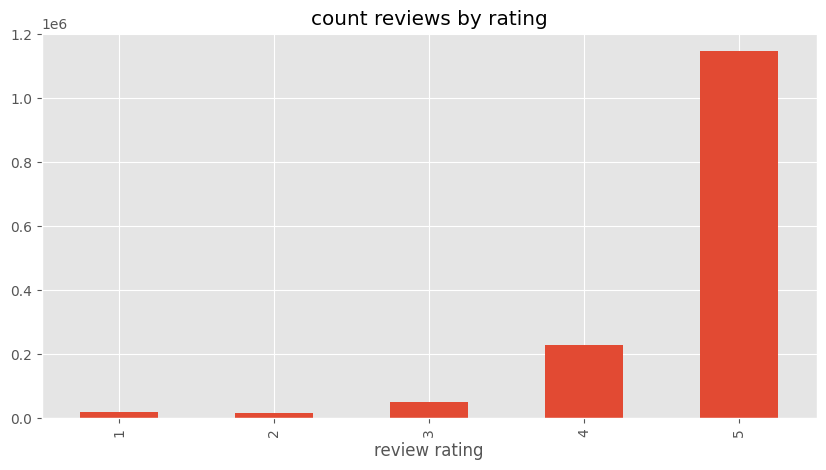

In [91]:
#Plotting a graph for review rating for thw whole dataset
ax=df['rating'].value_counts().sort_index().plot(kind='bar', title='count reviews by rating',figsize=(10,5))
ax.set_xlabel('review rating')
plt.show()

In [92]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records
print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    78.79
4    15.58
3     3.32
1     1.19
2     1.11
Name: count, dtype: float64


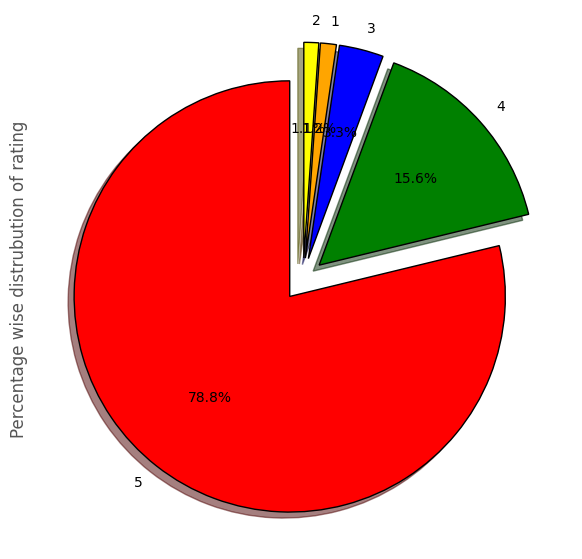

In [93]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['rating'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [94]:
#reducing the size of df for variations

df=df.head(150000)
print(df.shape)

(150000, 5)


In [95]:
#Distinct values of 'course id' and their count 
print(f"Course ID count: \n{df['course_id'].value_counts()}")

Course ID count: 
course_id
python                           44292
neural-networks-deep-learning    35750
ai-for-everyone                  21630
computer-networking              13672
python-crash-course               9399
financial-markets-global          8230
psychological-first-aid           7666
introduction-psychology           7410
what-is-datascience               1864
google-cbrs-cpi-training            87
Name: count, dtype: int64


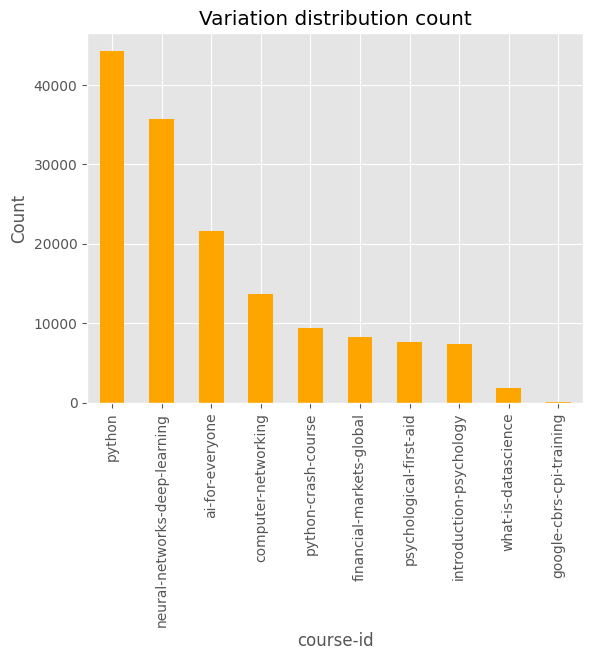

In [96]:
#Bar graph to visualize the total counts of each variation

df['course_id'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('course-id')
plt.ylabel('Count')
plt.show()

In [97]:
#Finding the rating distribution of each course-id 

df.groupby('course_id')['rating'].mean()

course_id
ai-for-everyone                  4.843551
computer-networking              4.656451
financial-markets-global         4.810085
google-cbrs-cpi-training         4.931034
introduction-psychology          4.842105
neural-networks-deep-learning    4.775888
psychological-first-aid          4.865380
python                           4.580331
python-crash-course              4.734440
what-is-datascience              2.606223
Name: rating, dtype: float64

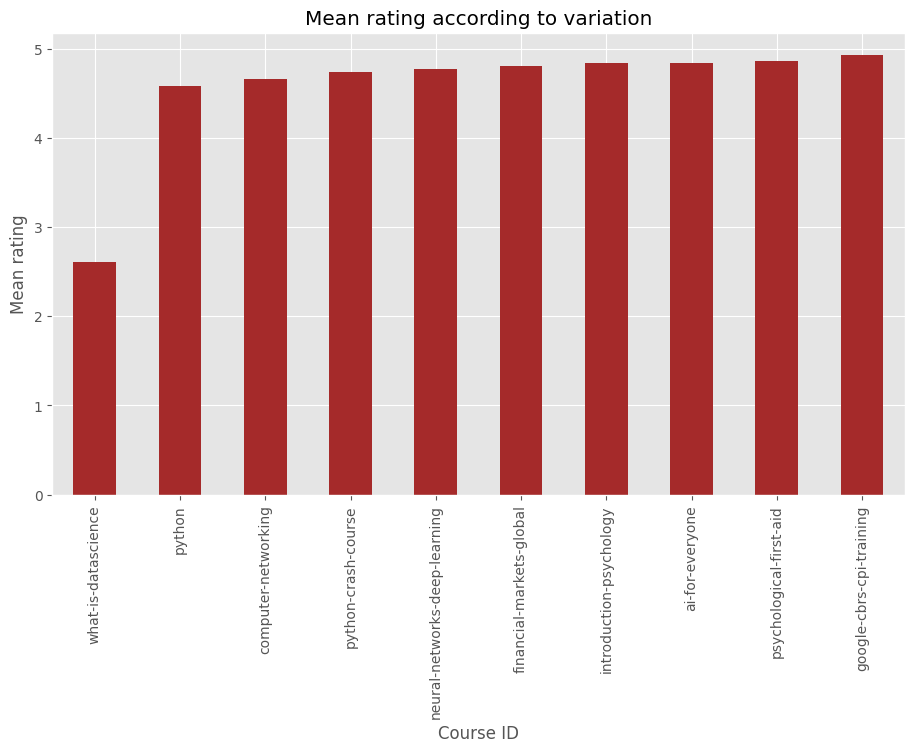

In [98]:
df.groupby('course_id')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Course ID')
plt.ylabel('Mean rating')
plt.show()

In [99]:
#reducing size again for fast processing
df=df.head(500)
df.shape

(500, 5)

Plotting a graph on the count of rating

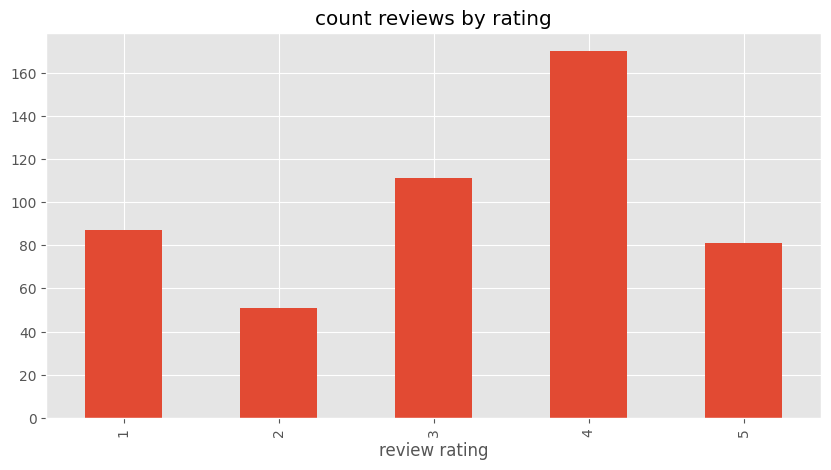

In [100]:
ax=df['rating'].value_counts().sort_index().plot(kind='bar', title='count reviews by rating',figsize=(10,5))
ax.set_xlabel('review rating')
plt.show()

In [101]:
#performing BASIC NLTK commands
example = df['reviews'][50]
print(example)

Very well explained.


In [102]:
#splitting example into tokens
tokens=nltk.word_tokenize(example)
print(tokens)

['Very', 'well', 'explained', '.']


In [103]:
#Finding parts of speech for each token
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Very', 'RB'), ('well', 'RB'), ('explained', 'VBN'), ('.', '.')]


In [104]:
#chunks of every parts of speech
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()
#pprint()-> pretty print

(S Very/RB well/RB explained/VBN ./.)


# Performing Sentimental Analysis using VADER
(Valence Aware Dictionary and sEntiment Reasoner)

In [105]:
#importing tools

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sentiment_analyzer=SentimentIntensityAnalyzer()

In [106]:
#Running some examples
vader_ex1="this is a good course"
vader_ex2="this is a bad course"
print(vader_ex1)
sentiment_analyzer.polarity_scores(vader_ex1)


this is a good course


{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [107]:
print(vader_ex2)
sentiment_analyzer.polarity_scores(vader_ex2)

this is a bad course


{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

As you can see it can tell sentiments of the text

In [108]:
#run the plarity score on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['reviews']
    myid = i
    res[myid]=sentiment_analyzer.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [109]:
#adding ID column to dataset
df =  df.reset_index().rename(columns=
                                     {'index': 'Id'})
df.head()

,Id,reviews,reviewers,date_reviews,rating,course_id
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [110]:
#merging dataset with res

vaders = pd.DataFrame(res).T
vaders =  vaders.reset_index().rename(columns=
                                     {'index': 'Id'})
vaders = vaders.merge(df,how='left')

In [111]:
vaders.head()

,Id,neg,neu,pos,compound,reviews,reviewers,date_reviews,rating,course_id
0,0,0.102,0.738,0.160,0.6440,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,0.000,0.943,0.057,0.4404,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,0.097,0.735,0.168,0.6572,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,0.090,0.717,0.193,0.4633,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,0.000,0.616,0.384,0.7823,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


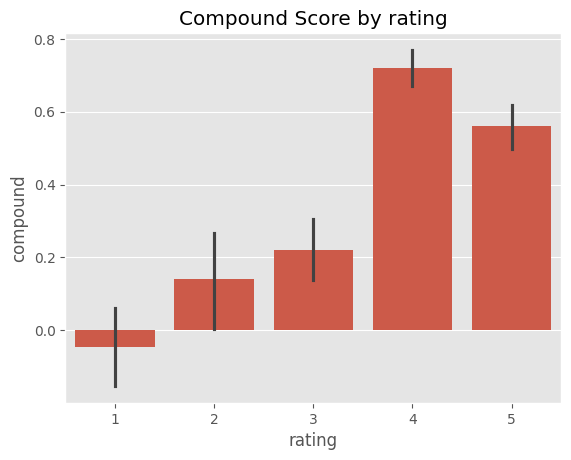

In [112]:
#plotting graph for compound by rating

ax= sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compound Score by rating')
plt.show()

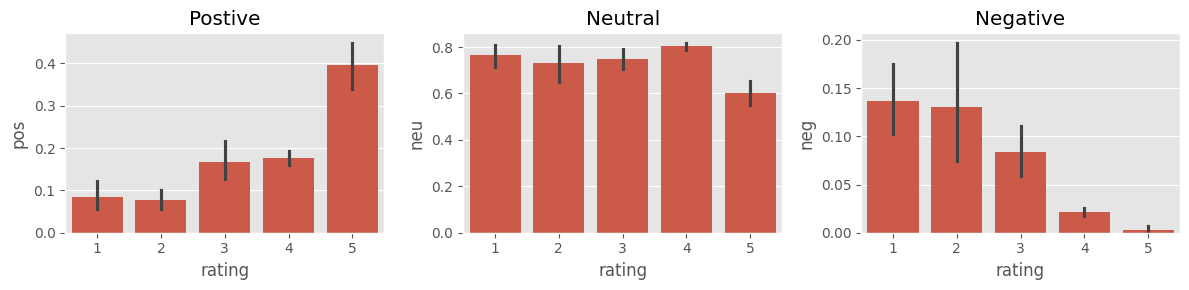

In [113]:
#plotting graph for each type of sentiment(postive , negative and neutral)
fig,axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders , x='rating',y='pos',ax=axs[0])
sns.barplot(data=vaders , x='rating',y='neu',ax=axs[1])
sns.barplot(data=vaders , x='rating',y='neg',ax=axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Performing Sentimental Analysis using Roberta
Robustly Optimized BERT Approach

We will use a roberta base model from huggingface , which is trained on 124M tweets from January 2018 to December 2021.


In [114]:
#importing tools
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [130]:
#adding model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [116]:
# run for roberta
encoded_text=tokenizer(vader_ex1,return_tensors='pt')
output =  model(**encoded_text)
scores = output[0][0].detach().numpy()
scores =  softmax(scores)
scores_dict ={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)


{'roberta_neg': 0.003999076, 'roberta_neu': 0.039999966, 'roberta_pos': 0.9560009}


In [117]:
#defining the fuction for roberta model

def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output =  model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores =  softmax(scores)
    scores_dict ={
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [118]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['reviews']
        myid =  i
        roberta_result = polarity_scores_roberta(text)
        res[myid]=roberta_result
    except RuntimeError:
        print(f'Broke for id{myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id336
Broke for id361
Broke for id386


In [119]:
#merging dataset with res
robertas = pd.DataFrame(res).T
robertas =  robertas.reset_index().rename(columns=
                                     {'index': 'Id'})
robertas = robertas.merge(df,how='left')

In [120]:
robertas.head()

,Id,roberta_neg,roberta_neu,roberta_pos,reviews,reviewers,date_reviews,rating,course_id
0,0,0.116416,0.212587,0.670997,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,0.165609,0.560952,0.273438,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,0.129449,0.240444,0.630106,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,0.401633,0.440915,0.157452,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,0.004041,0.048863,0.947095,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


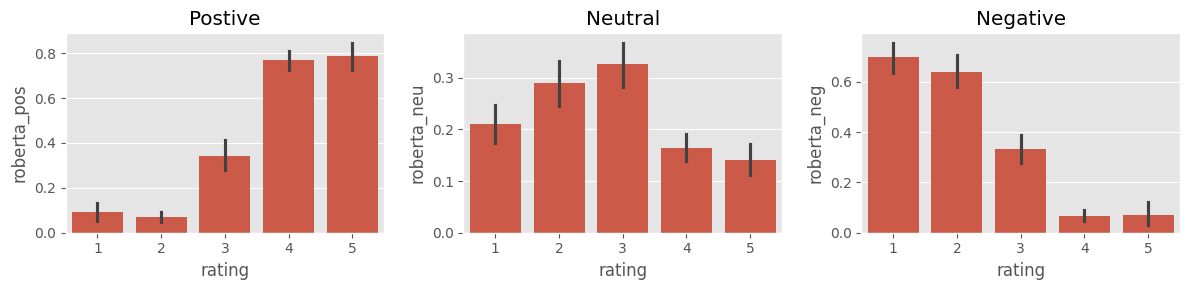

In [121]:
#plotting graph for each type of sentiment(postive , negative and neutral)

fig1,axs1 = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=robertas , x='rating',y='roberta_pos',ax=axs1[0])
sns.barplot(data=robertas , x='rating',y='roberta_neu',ax=axs1[1])
sns.barplot(data=robertas , x='rating',y='roberta_neg',ax=axs1[2])
axs1[0].set_title('Postive')
axs1[1].set_title('Neutral')
axs1[2].set_title('Negative')
plt.tight_layout()
plt.show()

# We will now review some examples for both Vader and Roberta

reviews which are more positive but 1 star rating


**Vader:-**

In [122]:
vaders.query('rating==1').sort_values('pos', ascending=False)['reviews'].values[0]

'pretty good'

**Roberta:-**

In [123]:
robertas.query('rating==1').sort_values('roberta_pos', ascending=False)['reviews'].values[0]

'pretty good'

reviews which are more positive but 1 star rating


**Vader:-**

In [124]:
vaders.query('rating==5').sort_values('neg', ascending=False)['reviews'].values[0]

'The ProctorU.com system took 2 times the amount of time spent on this course over 3 days to complete.  It is the worse production user system I have used in 20+ years of my IT career.    You should switch to another vendor.'

**Roberta:-**

In [125]:
robertas.query('rating==5').sort_values('roberta_neg', ascending=False)['reviews'].values[0]

'The ProctorU.com system took 2 times the amount of time spent on this course over 3 days to complete.  It is the worse production user system I have used in 20+ years of my IT career.    You should switch to another vendor.'

# Performing Sentimental Analysis using Transformer's Pipeline
   Quick and easy way to run sentimental analysis


In [133]:
#importing tools
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [135]:
pip_res=sent_pipeline("Tsunami is good for a country")
print(pip_res)

[{'label': 'POSITIVE', 'score': 0.9989402890205383}]


In [127]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['reviews']
        myid =  i
        pip_res=sent_pipeline(text)
        res[myid]=pip_res[0]
    except RuntimeError:
        print(f'error at id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1102 > 512). Running this sequence through the model will result in indexing errors


error at id 336
error at id 361
error at id 386


In [128]:
pipelines= pd.DataFrame(res).T
pipelines= pipelines.reset_index().rename(columns={'index':'Id'})
pipelines = pipelines.merge(df,how='left')

In [129]:
pipelines.head(20)

,Id,label,score,reviews,reviewers,date_reviews,rating,course_id
0,0,POSITIVE,0.979639,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,NEGATIVE,0.979665,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,NEGATIVE,0.984432,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,POSITIVE,0.995321,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,POSITIVE,0.999806,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
5,5,NEGATIVE,0.996641,Some of the quizzes contained material not exp...,By Daniel F,"Dec 23, 2019",4,google-cbrs-cpi-training
6,6,POSITIVE,0.998825,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
7,7,POSITIVE,0.999729,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
8,8,NEGATIVE,0.999783,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
9,9,POSITIVE,0.985159,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
